In [1]:
import pandas as pd
from eventregistry import *
import json, os, sys

In [2]:
data = pd.read_csv("../data/sp_400_midcap.csv")

In [3]:
data['GICS Sector'].unique()

array(['Materials', 'Industrials', 'Health Care', 'Real Estate',
       'Consumer Discretionary', 'Financials', 'Utilities',
       'Information Technology', 'Energy', 'Consumer Staples',
       'Communication Services'], dtype=object)

In [4]:
sector_keywords = {
    "Materials": ["mining", "chemical manufacturing", "raw materials"],
    "Industrials": ["manufacturing", "industrial equipment", "aerospace"],
    "Health Care": ["pharmaceuticals", "biotechnology", "health services"],
    "Real Estate": ["property development", "housing market", "commercial real estate"],
    "Consumer Discretionary": ["retail", "leisure products", "automobiles"],
    "Financials": ["banking", "investment"],
    "Utilities": ["electricity", "natural gas", "water services"],
    "Information Technology": ["software", "hardware", "tech services"],
    "Energy": ["oil", "renewable energy", "gas"],
    "Consumer Staples": ["food products", "household goods", "beverages"],
    "Communication Services": ["telecom", "media", "advertising"]
}

contextual_keywords = [
    "earnings", "trends", "market", "analysis", "SP400 Mid Cap"
]

In [5]:
def generate_keywords(sector_keywords, context_keywords):
    combined_keywords = {}
    for sector, base_keywords in sector_keywords.items():
        combined_keywords[sector] = []
        for base in base_keywords:
             combined_keywords[sector].append(base)
        for context in context_keywords:
                combined_keywords[sector].append(context)
    return combined_keywords

In [6]:
keyword = generate_keywords(sector_keywords, contextual_keywords)

In [26]:
keyword['Financials']

['banking',
 'investment',
 'earnings',
 'trends',
 'market',
 'analysis',
 'SP400 Mid Cap']

In [8]:
er = EventRegistry(apiKey = "cfd38812-1b95-4114-b0c0-39efacba95cf")

q = QueryArticlesIter(
    keywords = QueryItems.OR(keyword['Financials']),
    dateStart="2024-10-11",
    dateEnd="2024-10-11",
    lang="eng")

print("Number of results: %d" % q.count(er))

tmp = []
for art in q.execQuery(er, sortBy="rel", maxItems=100):
    print(json.dumps(art, indent=4))
    tmp.append(art)

Number of results: 34258
{
    "uri": "8359272297",
    "lang": "eng",
    "isDuplicate": false,
    "date": "2024-10-11",
    "time": "11:00:58",
    "dateTime": "2024-10-11T11:00:58Z",
    "dateTimePub": "2024-10-11T11:00:44Z",
    "dataType": "news",
    "sim": 0,
    "url": "https://www.thehindubusinessline.com/markets/stock-market-highlights-11-october-2024/article68742161.ece",
    "title": "Share Market Highlights: 11 October 2024: Sensex falls 230 points, Nifty slips amid foreign outflows and geopolitical tensions",
    "body": "Stock Market on 11 October 2024 | Share Market Updates - Find here all the updates related to Sensex, Nifty, BSE, NSE, share prices and Indian stock markets.\n\nALL UPDATESOctober 11, 2024 15:44Currency market updates: Rupee declines 9 paise to 84.07 (provisional) against US dollar. October 11, 2024 15:39Stock market live today: DSJ Keep Learning CFO Shrikant Chilveri steps down effective October 12, 2024\n\nDSJ Keep Learning announced resignation of Sh

In [9]:
full = ''
for art in tmp:
    title = art['title'].strip()
    boby = art['body'].strip()
    content = title + " " +  boby
    full += content

full = re.sub(r'\s+', ' ', full).strip()


In [10]:
with open("articles_content.txt", "w") as file:
    file.write(full)

## start

In [11]:
with open("articles_content.txt", "r") as file:
    content = file.read()

In [12]:
content[0:100]

'Share Market Highlights: 11 October 2024: Sensex falls 230 points, Nifty slips amid foreign outflows'

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


In [18]:
tokens = word_tokenize(content)

In [21]:
stop_words = set(stopwords.words('english'))

tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]

In [23]:
processed_text = ' '.join(tokens)

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

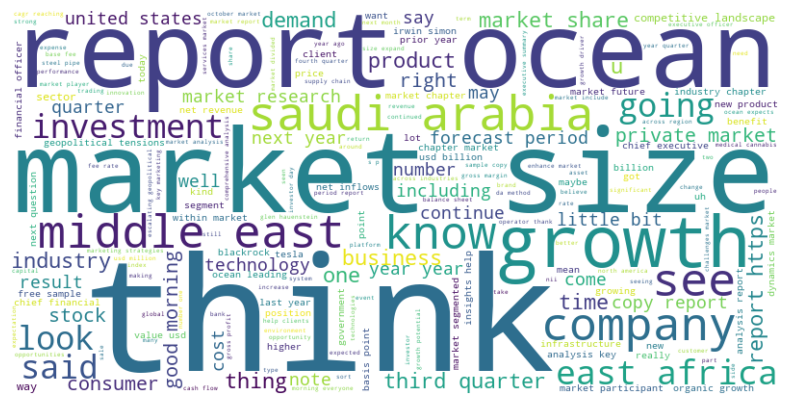

In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
processed_text[0:100]

'share market highlights october sensex falls points nifty slips amid foreign outflows geopolitical t'

In [30]:
len(content)

2100660